<a href="https://colab.research.google.com/github/ritwikraha/computer-needs-glasses/blob/master/image-generation/Prompt_Weighting_with_Spright.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Prompt Weighting with SPRIGHT

In [2]:
!pip install -qq diffusers transformers xformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.
torchtext 0.17.1 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.
torchvision 0.17.1+cu121 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.


In [4]:
!pip install compel -q

In [5]:
from diffusers import DiffusionPipeline
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler
from compel import Compel
import torch

In [7]:
pipe_id = "SPRIGHT-T2I/spright-t2i-sd2"

pipe = DiffusionPipeline.from_pretrained(
    pipe_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 5000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [8]:
compel_proc = Compel(tokenizer=pipe.tokenizer, text_encoder=pipe.text_encoder)

In [11]:
prompt = "a cute kitten--- is sitting in a dish++ on a table++"
prompt_embeds = compel_proc(prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

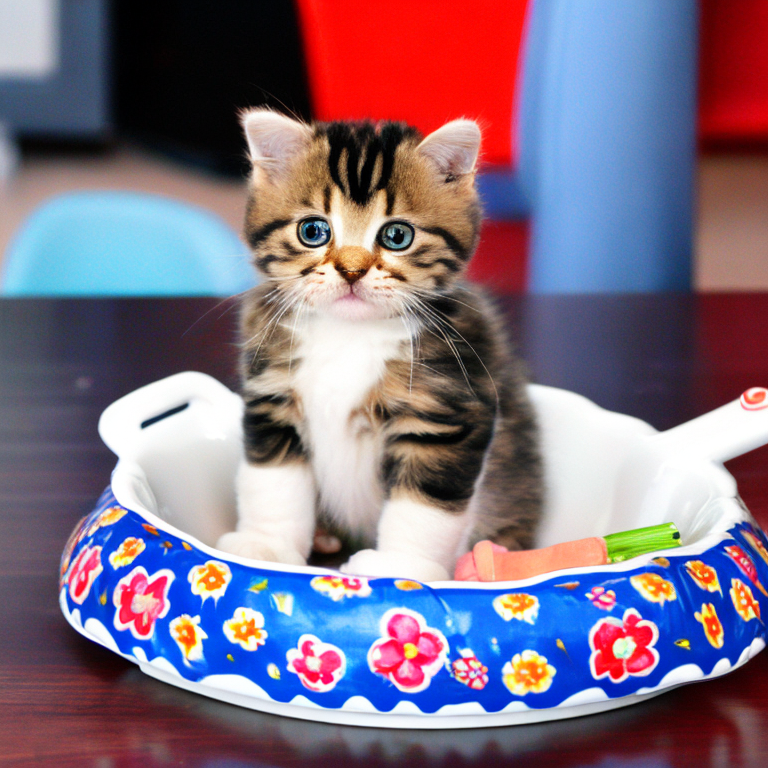

In [12]:
output = pipe(prompt_embeds=prompt_embeds).images[0]
output

  0%|          | 0/50 [00:00<?, ?it/s]

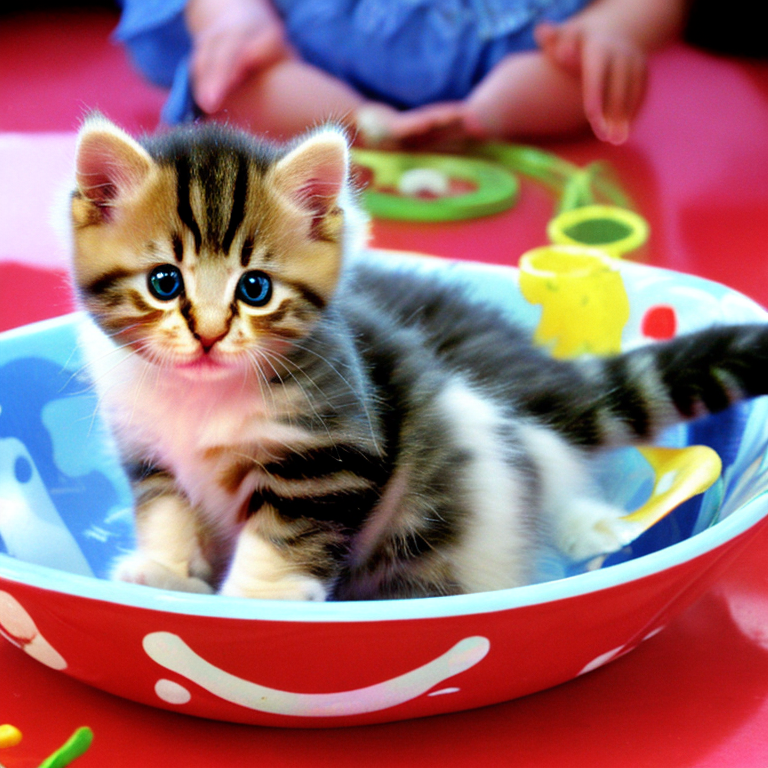

In [13]:
output2 = pipe(prompt).images[0]
output2